<a href="https://colab.research.google.com/github/stonelly/suicideprediction/blob/main/SuicidePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.0 Business Understanding**

In nowadays norm, suicide is considered one of the critical social issues, as  suicide is quoted as the act of killing yourself deliberately. Globally, there are more than 700,000 persons committed suicide annually. Based on the publication of Global Health Estimates (Suicide worldwide in 2019), it is stated that 77% of deaths of suicide occured in the low and middle income countries.

Generally, suicide is linked to the mental health issue which is likely due to the pressure from the surrounding. Hence, we should look into the socioeconomics. Socioeconomics is a branch of economics focuses on the relationship between social behavior and economics. In this projects, key variables such as GDP, inflation rates, employment rate, academic qualification related data are conjectured to be crucial to proceed in the whole CRISP-DM process.


Objectives for this project are

1.) To determine which socioeconomics factor(s) is strongly correlated to the numbers of suicides

2.) To construct a model to forecast the potential risk of suicide

3.) To propose data product to relevant parties to improve this social phenomena


# **2.0 Data Preprocessing and Data cleaning**

Importing libaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.io as pio


import warnings
warnings.filterwarnings('ignore')

##Importing csv

In [2]:
df = pd.read_csv('../data/suicide_rates_1990-2022.csv')

In [3]:
print('### first 5 lines ###','\n')
df.head()

### first 5 lines ### 



,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
0,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
1,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
2,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
3,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
4,EU,Europe,ALB,Albania,1992,Male,15-24 years,Generation Z,5.0,3.401361,3.531073,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315


##inspecting the data

In [4]:
# Dataframe summary

def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values

    display(summ)

summary(df)

data shape: (118560, 18)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
RegionCode,object,0,0.000000,22584,6,118560,NaN,NaN,NaN,NaN,EU,EU,EU
RegionName,object,0,0.000000,22584,6,118560,NaN,NaN,NaN,NaN,Europe,Europe,Europe
CountryCode,object,0,0.000000,22584,117,118560,NaN,NaN,NaN,NaN,ALB,ALB,ALB
CountryName,object,0,0.000000,22584,117,118560,NaN,NaN,NaN,NaN,Albania,Albania,Albania
Year,int64,0,0.000000,22584,33,118560,1990.0,2022.0,2005.740047,8.745003,1992,1992,1992
Sex,object,0,0.000000,22584,3,118560,NaN,NaN,NaN,NaN,Male,Male,Male
AgeGroup,object,0,0.000000,22584,7,118560,NaN,NaN,NaN,NaN,0-14 years,0-14 years,0-14 years
Generation,object,0,0.000000,22584,7,118560,NaN,NaN,NaN,NaN,Generation Alpha,Generation Alpha,Generation Alpha
SuicideCount,float64,464,0.003914,22584,1868,118096,0.0,6787.0,63.632037,254.095408,0.0,0.0,0.0
CauseSpecificDeathPercentage,float64,4289,0.036176,22584,46425,114271,0.0,100.0,3.87369,7.31782,0.0,0.0,0.0


## Removing 2022 data

In [5]:
# Excluding 2022 data as found that incomplete data for this year

index_names = df[ df['Year'] == 2022 ].index

df.drop(index_names, inplace = True)


##Checking for null values

In [6]:
print("\nMissing values in the DataFrame:")
print(df.isnull().sum())


Missing values in the DataFrame:
RegionCode                          0
RegionName                          0
CountryCode                         0
CountryName                         0
Year                                0
Sex                                 0
AgeGroup                            0
Generation                          0
SuicideCount                      464
CauseSpecificDeathPercentage     4267
DeathRatePer100K                10636
Population                       5920
GDP                              7240
GDPPerCapita                     7240
GrossNationalIncome              9960
GNIPerCapita                    10760
InflationRate                   14460
EmploymentPopulationRatio       11120
dtype: int64


## Data Transformation

Remove Irrelevant Variable

In [7]:

# remove similar value variables
# RegionCode : RegionName
# CountryCode : CountryName
# AgeGroup : Generation
df.drop(columns=['RegionCode','CountryCode','AgeGroup'], inplace=True)

In [8]:
# Assign "0" for female, "1" for male, "2" for unknown
df.loc[df["Sex"] == "Female", "Sex"] = 0
df.loc[df["Sex"] == "Male", "Sex"] = 1
df.loc[df["Sex"] == "Unknown", "Sex"] = 2


# Assign "0" for Unknown
# Assign "1" for Silent Generation
# Assign "2" for Baby Boomers
# Assign "3" for Generation X
# Assign "4" for Millennials
# Assign "5" for Generation Z
# Assign "6" for Generation Alpha
df.loc[df["Generation"] == "Unknown", "Generation"] = 0
df.loc[df["Generation"] == "Silent Generation", "Generation"] = 1
df.loc[df["Generation"] == "Baby Boomers", "Generation"] = 2
df.loc[df["Generation"] == "Generation X", "Generation"] = 3
df.loc[df["Generation"] == "Millennials", "Generation"] = 4
df.loc[df["Generation"] == "Generation Z", "Generation"] = 5
df.loc[df["Generation"] == "Generation Alpha", "Generation"] = 6

In [9]:
df['Sex'] = df['Sex'].astype(int)
df['Generation'] = df['Generation'].astype(int)

In [10]:
# Calculate percentage of missing values for each variable
percentage_missing = (df.isnull().sum() / len(df)) * 100

print("Percentage of missing values for each variable:")
print(percentage_missing)

Percentage of missing values for each variable:
RegionName                       0.000000
CountryName                      0.000000
Year                             0.000000
Sex                              0.000000
Generation                       0.000000
SuicideCount                     0.393220
CauseSpecificDeathPercentage     3.616102
DeathRatePer100K                 9.013559
Population                       5.016949
GDP                              6.135593
GDPPerCapita                     6.135593
GrossNationalIncome              8.440678
GNIPerCapita                     9.118644
InflationRate                   12.254237
EmploymentPopulationRatio        9.423729
dtype: float64


Apply K-Nearest Neighbors (KNN) Imputation for missing data, since there are no variable missing more than 20%

In [11]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Step 1: Identify numeric columns with missing values
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Step 2: Apply KNN imputation only to numeric features
imputer = KNNImputer(n_neighbors=20)
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

print("\nMissing values in the DataFrame:")
print(df.isnull().sum())


Missing values in the DataFrame:
RegionName                      0
CountryName                     0
Year                            0
Sex                             0
Generation                      0
SuicideCount                    0
CauseSpecificDeathPercentage    0
DeathRatePer100K                0
Population                      0
GDP                             0
GDPPerCapita                    0
GrossNationalIncome             0
GNIPerCapita                    0
InflationRate                   0
EmploymentPopulationRatio       0
dtype: int64


Export Clean data to csv

In [12]:
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values

    display(summ)

summary(df)

data shape: (118000, 15)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
RegionName,object,0,0.0,22550,6,118000,NaN,NaN,NaN,NaN,Europe,Europe,Europe
CountryName,object,0,0.0,22550,117,118000,NaN,NaN,NaN,NaN,Albania,Albania,Albania
Year,float64,0,0.0,22550,32,118000,1990.0,2021.0,2005.662881,8.693522,1992.0,1992.0,1992.0
Sex,int32,0,0.0,22550,3,118000,0.0,2.0,0.524407,0.530989,1,1,1
Generation,int32,0,0.0,22550,7,118000,0.0,6.0,3.25,1.867493,6,6,6
SuicideCount,float64,0,0.0,22550,1897,118000,0.0,6787.0,63.605425,254.193387,0.0,0.0,0.0
CauseSpecificDeathPercentage,float64,0,0.0,22550,47817,118000,0.0,100.0,3.849101,7.186848,0.0,0.0,0.0
DeathRatePer100K,float64,0,0.0,22550,73076,118000,0.0,502.512563,12.141834,20.296329,0.0,0.0,0.0
Population,float64,0,0.0,22550,4448,118000,40542.0,332031554.0,23996550.030703,44622079.429589,3247039.0,3247039.0,3247039.0
GDP,float64,0,0.0,22550,3332,118000,219762963.0,23315100000000.0,464478669918.546326,1609697329181.785156,652174990.8,652174990.8,652174990.8


In [13]:
#  Save the df as data.csv
df.to_csv('../data/data_clean.csv', index=False)

In [14]:
#import Clean Data
clean_data = pd.read_csv('../data/data_clean.csv')

# Correlation analysis
cat_features  = ['RegionName', 'CountryName','Sex','Generation']
print("\nCorrelation matrix:")
clean_data.drop(columns=cat_features).corr()


Correlation matrix:


,Year,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
Year,1.000000,-0.016014,0.041847,-0.098610,0.060679,0.098551,0.237923,0.096509,0.312182,-0.157857,0.090850
SuicideCount,-0.016014,1.000000,0.148316,0.264864,0.491842,0.446360,0.072713,0.445526,0.050371,0.013682,0.033743
CauseSpecificDeathPercentage,0.041847,0.148316,1.000000,0.155298,0.012330,0.078389,0.217576,0.079009,0.165438,-0.030474,0.030666
DeathRatePer100K,-0.098610,0.264864,0.155298,1.000000,0.020699,0.025497,0.014993,0.024850,-0.004151,0.034564,-0.063815
Population,0.060679,0.491842,0.012330,0.020699,1.000000,0.768630,0.060310,0.765286,0.035434,0.009087,0.040206
GDP,0.098551,0.446360,0.078389,0.025497,0.768630,1.000000,0.288576,0.998046,0.236581,-0.039537,0.063643
GDPPerCapita,0.237923,0.072713,0.217576,0.014993,0.060310,0.288576,1.000000,0.287320,0.846079,-0.098716,0.265985
GrossNationalIncome,0.096509,0.445526,0.079009,0.024850,0.765286,0.998046,0.287320,1.000000,0.236436,-0.040552,0.059799
GNIPerCapita,0.312182,0.050371,0.165438,-0.004151,0.035434,0.236581,0.846079,0.236436,1.000000,-0.111722,0.341023
InflationRate,-0.157857,0.013682,-0.030474,0.034564,0.009087,-0.039537,-0.098716,-0.040552,-0.111722,1.000000,-0.045917


# **3.0 Exploratory Data Analysis (EDA)**

## Suicide by year


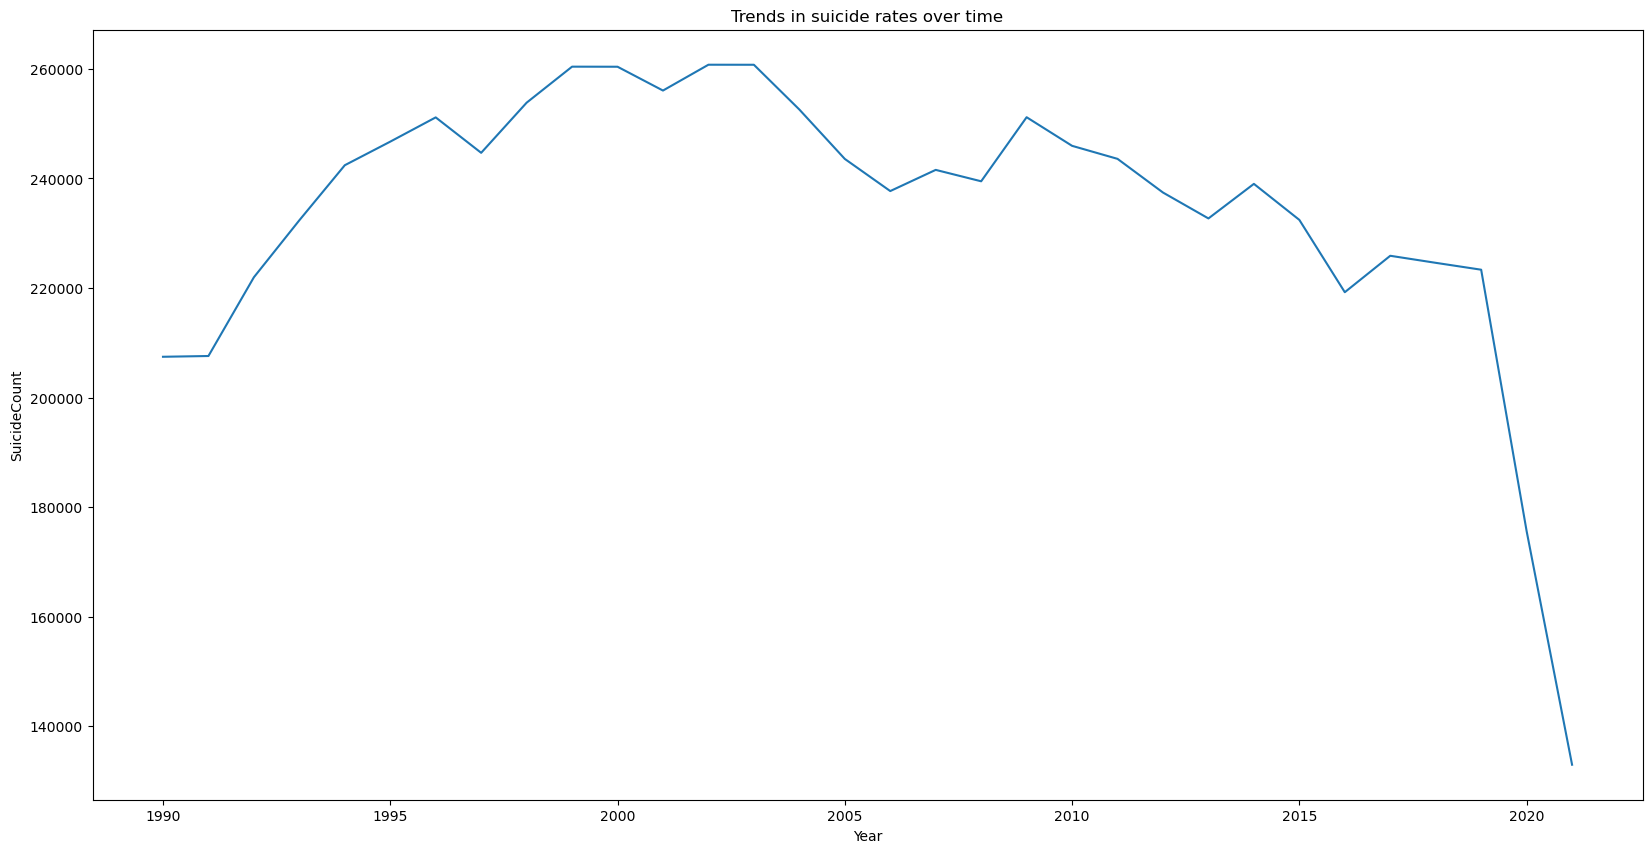

In [15]:
suicide_by_year = clean_data.groupby('Year')['SuicideCount'].sum()
suicide_by_year.plot(figsize=(20,10))
plt.title("Trends in suicide rates over time")
plt.ylabel("SuicideCount")
plt.xlabel('Year')
plt.show()

## Suicide by *Gender*

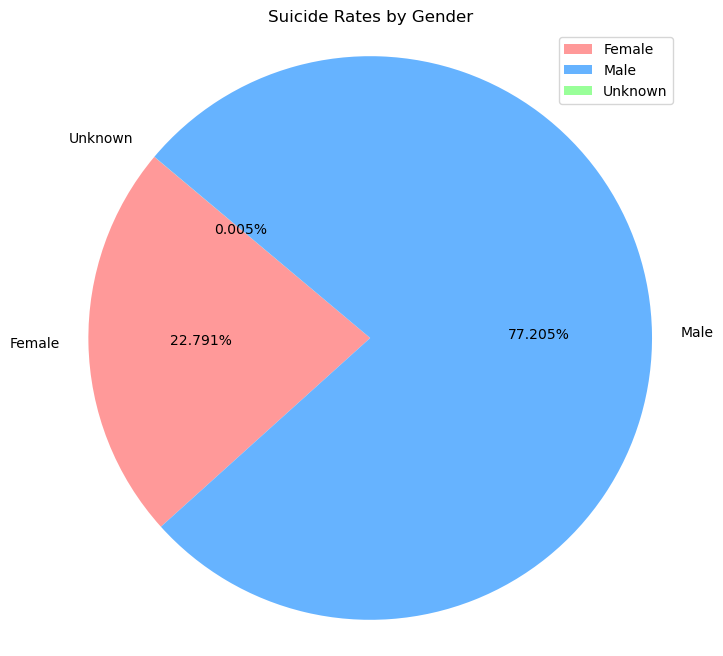

In [20]:
suicide_by_gender_age = clean_data.dropna().groupby(['Sex'])['SuicideCount'].sum()

labels = ['Female', 'Male', 'Unknown']
colors = ['#ff9999', '#66b3ff', '#99ff99']
plt.figure(figsize=(8, 8))
plt.pie(suicide_by_gender_age, labels=labels, colors=colors, autopct='%1.3f%%', startangle=140)
plt.title('Suicide Rates by Gender')
plt.axis('equal')
plt.legend(labels, loc='upper right')

plt.show()

## Suicide by *Generation*


In [21]:
clean_data['Generation'].unique()

array([6, 5, 4, 3, 2, 1, 0], dtype=int64)

In [44]:
# Create datasets
# df_Alpha = clean_data[clean_data['Generation'] == 'Generation Alpha']
# df_Z = clean_data[clean_data['Generation'] == 'Generation Z']
# df_Mill = clean_data[clean_data['Generation'] == 'Millennials']
# df_X = clean_data[clean_data['Generation'] == 'Generation X']
# df_BB = clean_data[clean_data['Generation'] == 'Baby Boomers']
# df_Silent = clean_data[clean_data['Generation'] == 'Silent Generation']


df_Alpha = clean_data[clean_data['Generation'] == 6]
df_Z = clean_data[clean_data['Generation'] == 5]
df_Mill = clean_data[clean_data['Generation'] == 4]
df_X = clean_data[clean_data['Generation'] == 3]
df_BB = clean_data[clean_data['Generation'] == 2]
df_Silent = clean_data[clean_data['Generation'] == 1]


# Groupby - Year
suicide_Alpha = df_Alpha.groupby('Year')['SuicideCount'].sum().reset_index()
suicide_Z = df_Z.groupby('Year')['SuicideCount'].sum().reset_index()
suicide_Mill = df_Mill.groupby('Year')['SuicideCount'].sum().reset_index()
suicide_X = df_X.groupby('Year')['SuicideCount'].sum().reset_index()
suicide_BB = df_BB.groupby('Year')['SuicideCount'].sum().reset_index()
suicide_Silent = df_Silent.groupby('Year')['SuicideCount'].sum().reset_index()

# Rename columns
suicide_Alpha.rename(columns = {'SuicideCount':'Alpha'}, inplace = True)
suicide_Z.rename(columns = {'SuicideCount':'Z'}, inplace = True)
suicide_Mill.rename(columns = {'SuicideCount':'Mill'}, inplace = True)
suicide_X.rename(columns = {'SuicideCount':'X'}, inplace = True)
suicide_BB.rename(columns = {'SuicideCount':'BB'}, inplace = True)
suicide_Silent.rename(columns = {'SuicideCount':'Silent'}, inplace = True)

# Concat datasets
suicide_generation = pd.concat([suicide_Alpha, suicide_Z, suicide_Mill,
                               suicide_X, suicide_BB, suicide_Silent])

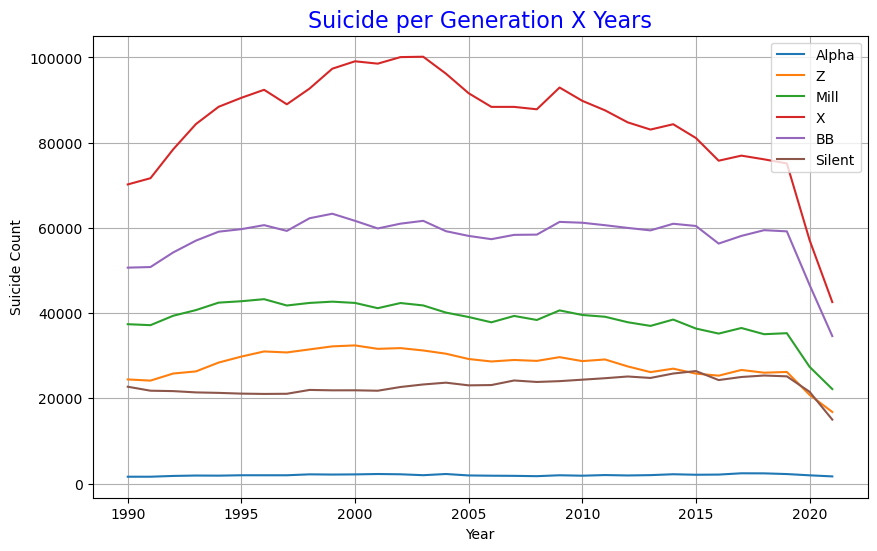

In [45]:
# Suicide per Generation X Years
suicide_generation.plot(x="Year", y=['Alpha', 'Z', 'Mill', 'X', 'BB', 'Silent'],
              kind="line", figsize=(10, 6))
plt.title("Suicide per Generation X Years", fontsize = 16, color = 'blue')
plt.ylabel('Suicide Count', rotation=90, fontsize = 10)

plt.grid()
plt.show()

## Suicide by *Region*

In [25]:
clean_data['RegionName'].unique()

array(['Europe', 'Central and South America', 'Asia', 'Oceania',
       'North America and the Caribbean', 'Africa'], dtype=object)

In [26]:
# Create datasets
df_Europe = clean_data[clean_data['RegionName'] == 'Europe']
df_Asia = clean_data[clean_data['RegionName'] == 'Asia']
df_Oceania = clean_data[clean_data['RegionName'] == 'Oceania']
df_Central_South_America = clean_data[clean_data['RegionName'] == 'Central and South America']
df_North_America_Caribbean = clean_data[clean_data['RegionName'] == 'North America and the Caribbean']
df_Africa = clean_data[clean_data['RegionName'] == 'Africa']

# Groupby - Year
suicide_Europe = df_Europe.groupby('Year')['SuicideCount'].sum().reset_index()
suicide_Asia = df_Asia.groupby('Year')['SuicideCount'].sum().reset_index()
suicide_Oceania = df_Oceania.groupby('Year')['SuicideCount'].sum().reset_index()
suicide_Central_South_America = df_Central_South_America.groupby('Year')['SuicideCount'].sum().reset_index()
suicide_North_America_Caribbean = df_North_America_Caribbean.groupby('Year')['SuicideCount'].sum().reset_index()
suicide_Africa = df_Africa.groupby('Year')['SuicideCount'].sum().reset_index()

# Rename columns
suicide_Europe.rename(columns = {'SuicideCount':'Europe'}, inplace = True)
suicide_Asia.rename(columns = {'SuicideCount':'Asia'}, inplace = True)
suicide_Oceania.rename(columns = {'SuicideCount':'Oceania'}, inplace = True)
suicide_Central_South_America.rename(columns = {'SuicideCount':'Central_South_America'}, inplace = True)
suicide_North_America_Caribbean.rename(columns = {'SuicideCount':'North_America_Caribbean'}, inplace = True)
suicide_Africa.rename(columns = {'SuicideCount':'Africa'}, inplace = True)

# Concat datasets
suicide_continent = pd.concat([suicide_Europe, suicide_Asia, suicide_Oceania,
                               suicide_Central_South_America,
                              suicide_North_America_Caribbean, suicide_Africa])

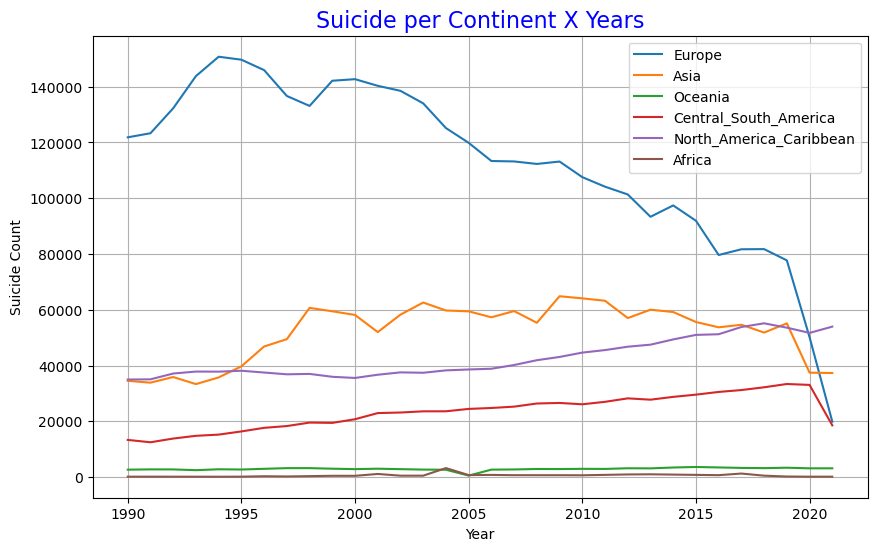

In [27]:
# Suicide per Continent X Years
suicide_continent.plot(x="Year", y=['Europe', 'Asia', 'Oceania', 'Central_South_America',
                     'North_America_Caribbean', 'Africa'],
              kind="line", figsize=(10, 6))
plt.title("Suicide per Continent X Years", fontsize = 16, color = 'blue')
plt.ylabel('Suicide Count', rotation=90, fontsize = 10)

plt.grid()
plt.show()

##Corelation heat map


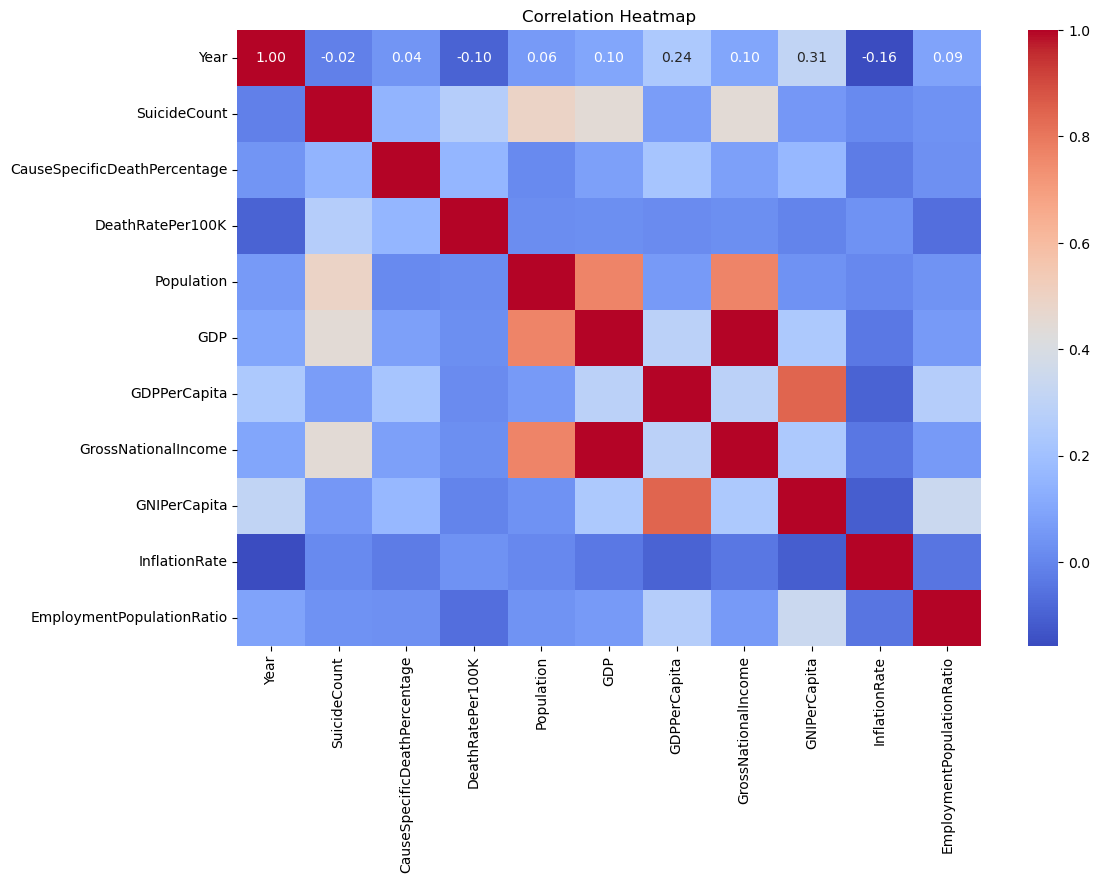

In [28]:
plt.figure(figsize=(12, 8))
sns.heatmap(clean_data.drop(columns=cat_features).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

##Pair Plot


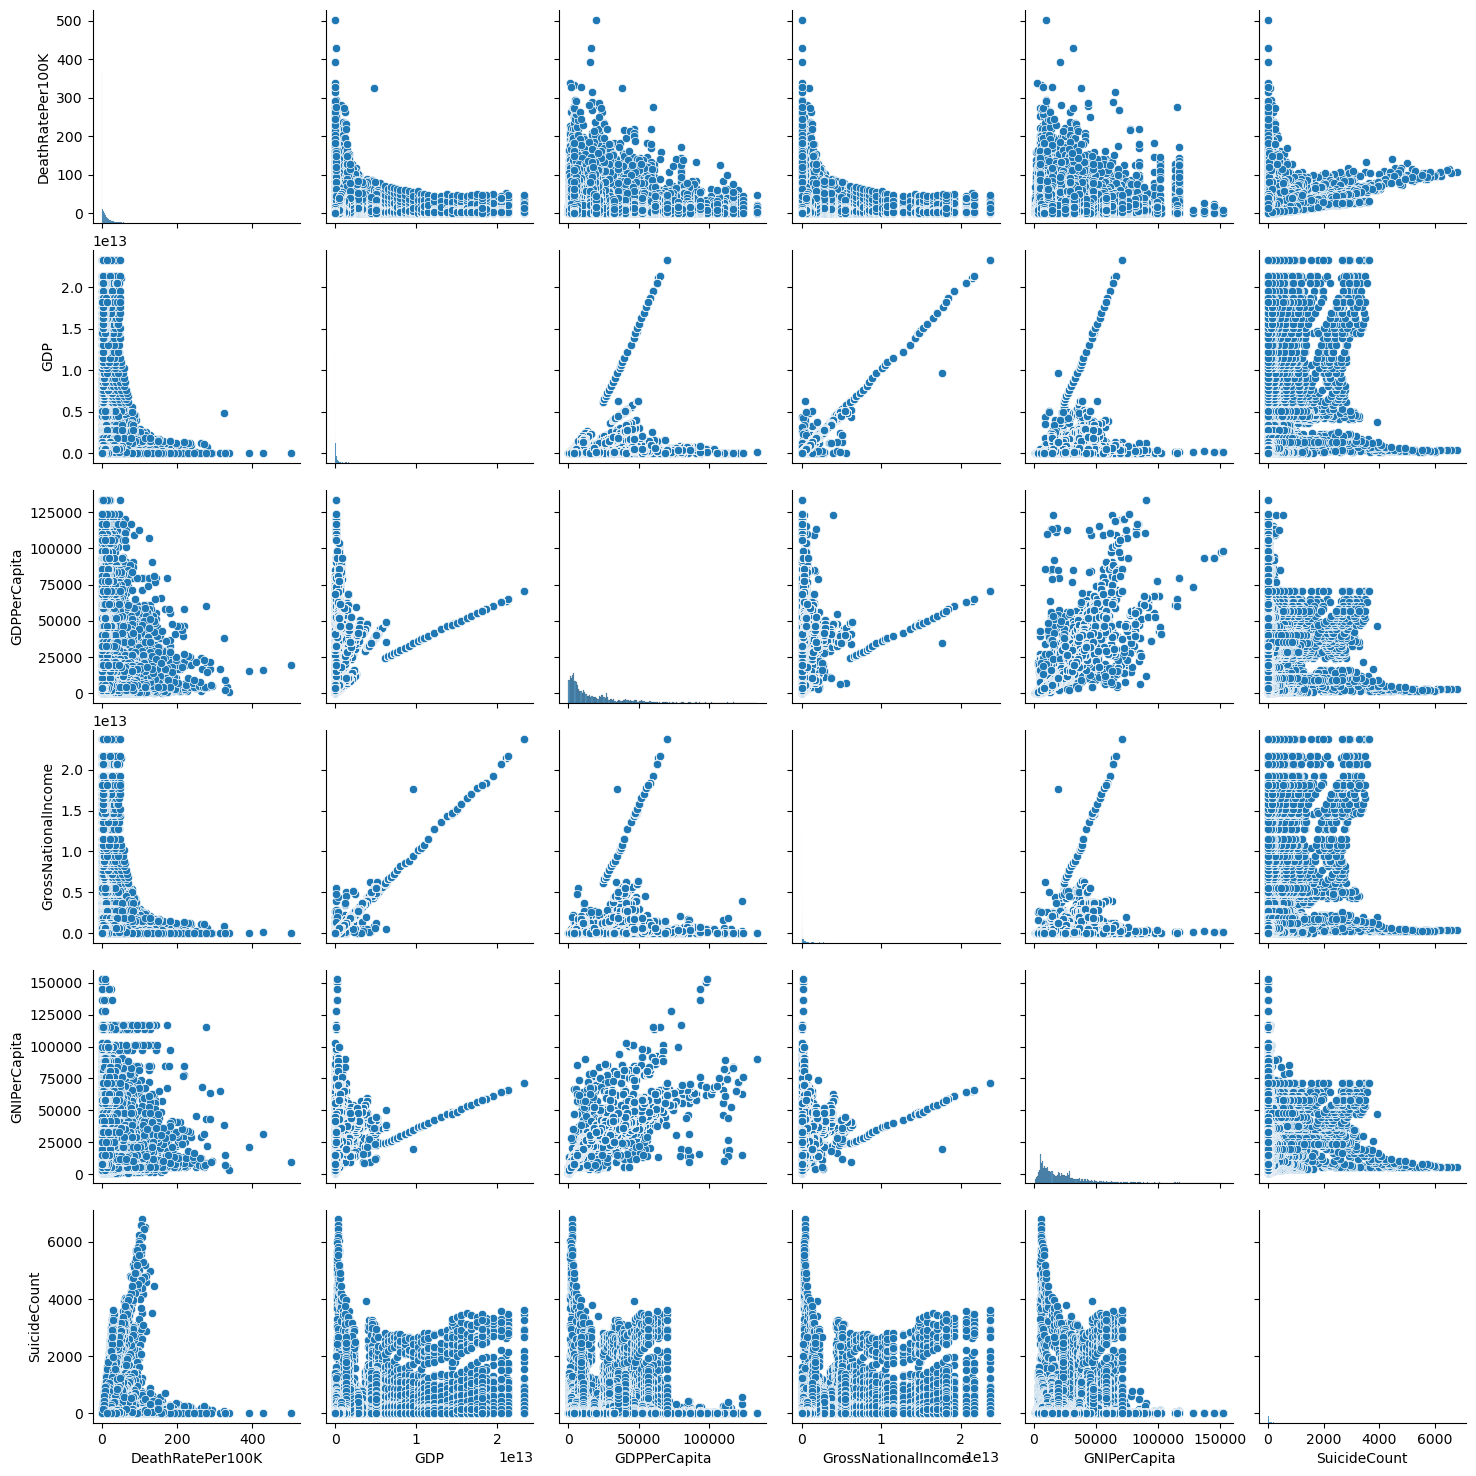

In [29]:
sns.pairplot(clean_data[['DeathRatePer100K', 'GDP', 'GDPPerCapita', 'GrossNationalIncome', 'GNIPerCapita','SuicideCount']])
plt.show()

# **4.0 Modelling**

## Prediction with Clean data

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Load the dataset
data = pd.read_csv('../data/data_clean.csv')

# Check the data structure
print(data.head())

# Extract features and target variable
X = data.drop('SuicideCount', axis=1)
y = data['SuicideCount']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the preprocessor and fit on training data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Define a dictionary of models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}

# Train and evaluate each model
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results[model_name] = {'MSE': mse, 'R2': r2}

    print(f"{model_name}: MSE = {mse:.4f}, R2 = {r2:.4f}")

# Compare the performance of the models
results_df = pd.DataFrame(results).T
print(results_df)

  RegionName CountryName    Year  Sex  Generation  SuicideCount  \
0     Europe     Albania  1992.0    1           6           0.0   
1     Europe     Albania  1992.0    1           6           0.0   
2     Europe     Albania  1992.0    1           6           0.0   
3     Europe     Albania  1992.0    1           6           0.0   
4     Europe     Albania  1992.0    1           5           5.0   

   CauseSpecificDeathPercentage  DeathRatePer100K  Population          GDP  \
0                      0.000000          0.000000   3247039.0  652174990.8   
1                      0.000000          0.000000   3247039.0  652174990.8   
2                      0.000000          0.000000   3247039.0  652174990.8   
3                      0.000000          0.000000   3247039.0  652174990.8   
4                      3.401361          3.531073   3247039.0  652174990.8   

   GDPPerCapita  GrossNationalIncome  GNIPerCapita  InflationRate  \
0     200.85222          906184212.3        1740.0     226.

## Import Libraries for Machine Learning

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Pre-processing

### Load Cleaned Dataset

In [39]:
# Load the dataset
data = pd.read_csv('../data/data_clean.csv')
data.head()

,RegionName,CountryName,Year,Sex,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
0,Europe,Albania,1992.0,1,6,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
1,Europe,Albania,1992.0,1,6,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
2,Europe,Albania,1992.0,1,6,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
3,Europe,Albania,1992.0,1,6,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
4,Europe,Albania,1992.0,1,5,5.0,3.401361,3.531073,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315


### Feature Selection
Columns 'RegionName', 'Sex','Generation','Population','GDP','GrossNationalIncome', 'InflationRate', ‘EmploymentPopulationRatio’ are selected while the rest are dropped.

In [46]:
# Drop Columns, feature selection according to correlation
columns_to_drop = ['CountryName','Year','CauseSpecificDeathPercentage','DeathRatePer100K','GDPPerCapita','GNIPerCapita']
data.drop(columns=columns_to_drop, inplace=True)
data.head()

,RegionName,Sex,Generation,SuicideCount,Population,GDP,GrossNationalIncome,InflationRate,EmploymentPopulationRatio
0,Europe,1,6,0.0,3247039.0,652174990.8,906184212.3,226.005421,45.315
1,Europe,1,6,0.0,3247039.0,652174990.8,906184212.3,226.005421,45.315
2,Europe,1,6,0.0,3247039.0,652174990.8,906184212.3,226.005421,45.315
3,Europe,1,6,0.0,3247039.0,652174990.8,906184212.3,226.005421,45.315
4,Europe,1,5,5.0,3247039.0,652174990.8,906184212.3,226.005421,45.315


### Set Constants for Random Seed and Folds
For reproducible research, all random seeds used shall be set as 42. The number of folds are all set to 5.

In [47]:
random_seed = 42
folds = 5

### Encoding
Columns with categorical values needs to be encoded before training. OneHotEncoder is used.

In [48]:
# Extract features and target variable
X = data.drop('SuicideCount', axis=1)
y = data['SuicideCount']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])


### Train-test Split
Before training, the data is split into training and testing sets, following a ratio of 0.8:0.2.

In [49]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

# Apply the preprocessor and fit on training data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

## Model Training
5 models are selected. Linear Regression, Decision Tree, Random Forest, Gradient Boosting, and XGBoost.


In [50]:
# Define a dictionary of models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}

### Training 5 Preliminary Models
The preliminary round of training is trained without cross validation and is used to gauge the effectiveness and suitability of each model with and without feature selection before testing the robustness of the results with k-fold cross validation.


In [51]:
# Train and evaluate each model
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results[model_name] = {'MSE': mse, 'R2': r2}

# Compare the performance of the models
print(pd.DataFrame(results).T)

                            MSE        R2
Linear Regression  43668.940019  0.264325
Decision Tree       8621.279174  0.854760
Random Forest       7503.152621  0.873597
Gradient Boosting  14761.310210  0.751322
XGBoost             6785.873766  0.885681


### K-fold Cross Validation
For k-fold cross validation, the number of folds is set to the pre-declared "folds" variable.

In [52]:
# Train and evaluate models with k-fold cross-validation
kf = KFold(n_splits=folds, shuffle=True, random_state=random_seed)

results_cv = {}

for name, model in models.items():
    # With k-fold cross-validation, evaluate results
    mse_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

    # Store the results
    results_cv[name] = {
        'MSE_CV': -mse_scores.mean(),
        'R2_CV': r2_scores.mean()
    }


# Compare the performance of the models
print(pd.DataFrame(results_cv).T)

                         MSE_CV     R2_CV
Linear Regression  47408.416392  0.281224
Decision Tree       8205.223438  0.873832
Random Forest       6332.966040  0.903290
Gradient Boosting  15969.020177  0.757626
XGBoost             5472.810995  0.916466


## Hyperparameter Tuning for Most Robust Models
After performing K-fold Cross-validation, Random Forest and XGBoost models are found to be the most robust. To increase the efficacy of the models, hyperparameter tunings are performed next.


### Hyperparameter Tuning for Random Forest
For hyperparameter tuning, mean-squared-error and R-squared are used as performance metrics. Three possible values are set for n_estimators, max_depth, min_samples_split, min_samples_leaf to test the hyperparameters while limiting processing time.


#### Declare Hyperparameter Grid

In [54]:
# Define the hyperparameters grid
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#### Mean-squared-error (MSE) Tuning for Random Forest Model

In [55]:
# Define the Random Forest model
rf = RandomForestRegressor()

# MSE Hyperparameters
# Perform Grid Search with 5-fold cross-validation
grid_search_rf_mse = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=folds, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf_mse.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best MSE Hyperparameters:", grid_search_rf_mse.best_params_)

# Train the model with the best hyperparameters
best_rf_mse = grid_search_rf_mse.best_estimator_
best_rf_mse.fit(X_train, y_train)

# Evaluate the model
y_pred_rf_mse = best_rf_mse.predict(X_test)
mse_rf_mse = mean_squared_error(y_test, y_pred_rf_mse)
r2_rf_mse = r2_score(y_test, y_pred_rf_mse)

print("Best MSE Performance:")
print(f"  MSE (Test): {mse_rf_mse:.4f}")
print(f"  R2 (Test): {r2_rf_mse:.4f}")

Best MSE Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best MSE Performance:
  MSE (Test): 6453.1145
  R2 (Test): 0.8913


#### R-squared (R2) Tuning for Random Forest Model

In [56]:
# R2 Hyperparameters
# Perform Grid Search with 5-fold cross-validation
grid_search_rf_r2 = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_rf_r2.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best R2 Hyperparameters:", grid_search_rf_r2.best_params_)

# Train the model with the best hyperparameters
best_rf_r2 = grid_search_rf_r2.best_estimator_
best_rf_r2.fit(X_train, y_train)

# Evaluate the model
y_pred_rf_r2 = best_rf_r2.predict(X_test)
mse_rf_r2 = mean_squared_error(y_test, y_pred_rf_r2)
r2_rf_r2 = r2_score(y_test, y_pred_rf_r2)

print("Best R2 Performance:")
print(f"  MSE (Test): {mse_rf_r2:.4f}")
print(f"  R2 (Test): {r2_rf_r2:.4f}")

Best R2 Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best R2 Performance:
  MSE (Test): 6477.6043
  R2 (Test): 0.8909


### Hyperparameter Tuning for XGBoost
For hyperparameter tuning, mean-squared-error and R-squared are used as performance metrics. Three possible values are set for n_estimators, max_depth, learning_rate, gamma, subsample, and colsample_bytree to test the hyperparameters while limiting processing time.


#### Declare Hyperparameter Grid

In [57]:
# Define the hyperparameters grid
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

#### Mean-squared-error (MSE) Tuning for XGBoost Model

In [58]:
# Define the XGBoost model
xgb = XGBRegressor()

# MSE Hyperparameters
# Perform Grid Search with 5-fold cross-validation for MSE
grid_search_xgb_mse = GridSearchCV(estimator=xgb, param_grid=xgb_param_grid, cv=folds, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_xgb_mse.fit(X_train, y_train)

# Get the best hyperparameters for MSE
best_params_xgb_mse = grid_search_xgb_mse.best_params_

# Print the best hyperparameters found
print("Best MSE Hyperparameters:", best_params_xgb_mse)

# Train the model with the best hyperparameters for MSE
best_xgb_mse = XGBRegressor(**best_params_xgb_mse)
best_xgb_mse.fit(X_train, y_train)

# Evaluate the model
y_pred_xgb_mse = best_xgb_mse.predict(X_test)
mse_xgb_mse = mean_squared_error(y_test, y_pred_xgb_mse)
r2_xgb_mse = r2_score(y_test, y_pred_xgb_mse)

print("Best MSE Performance:")
print(f"  MSE (Test): {mse_xgb_mse:.4f}")
print(f"  R2 (Test): {r2_xgb_mse:.4f}")

Best MSE Hyperparameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
Best MSE Performance:
  MSE (Test): 6606.4920
  R2 (Test): 0.8887


#### R-squared (R2) Tuning for XGBoost Model

In [59]:
# R2 Hyperparameters
# Perform Grid Search with 5-fold cross-validation for R2 score
grid_search_xgb_r2 = GridSearchCV(estimator=xgb, param_grid=xgb_param_grid, cv=folds, scoring='r2', n_jobs=-1)
grid_search_xgb_r2.fit(X_train, y_train)

# Get the best hyperparameters for R2 score
best_params_xgb_r2 = grid_search_xgb_r2.best_params_

# Print the best hyperparameters found
print("Best R2 Hyperparameters:", best_params_xgb_r2)

# Train the model with the best hyperparameters for R2 score
best_xgb_r2 = XGBRegressor(**best_params_xgb_r2)
best_xgb_r2.fit(X_train, y_train)

# Evaluate the model
y_pred_xgb_r2 = best_xgb_r2.predict(X_test)
mse_xgb_r2 = mean_squared_error(y_test, y_pred_xgb_r2)
r2_xgb_r2 = r2_score(y_test, y_pred_xgb_r2)

print("Best R2 Performance:")
print(f"  MSE (Test): {mse_xgb_r2:.4f}")
print(f"  R2 (Test): {r2_xgb_r2:.4f}")

Best R2 Hyperparameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
Best R2 Performance:
  MSE (Test): 6606.4920
  R2 (Test): 0.8887


### Tabulate Hyperparameter Tuning Results

In [60]:
results = np.array([[mse_rf_mse, r2_rf_mse],
                 [mse_rf_r2, r2_rf_r2],
                 [mse_xgb_mse, r2_xgb_mse],
                 [mse_xgb_r2, r2_xgb_r2]])

df_results = pd.DataFrame(results, index=['Random Forest Best MSE', 'Random Forest Best R2', 'XGB Best MSE', 'XGB Best R2'],
                          columns=['MSE', 'R2'])
print(df_results)

                                MSE        R2
Random Forest Best MSE  6453.114505  0.891287
Random Forest Best R2   6477.604256  0.890874
XGB Best MSE            6606.491951  0.888703
XGB Best R2             6606.491951  0.888703


## Final Models

In [61]:
# Define a dictionary of models
models_final = {
    'Tuned Random Forest': grid_search_rf_mse.best_estimator_,
    'Tuned XGBoost': XGBRegressor(**best_params_xgb_mse)
}

In [62]:
# Train and evaluate models with k-fold cross-validation
kf = KFold(n_splits=folds, shuffle=True, random_state=random_seed)

results_final = {}

for name, model in models_final.items():
    # With k-fold cross-validation, evaluate results
    mse_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
    
    # Store the results
    results_final[name] = {
        'MSE_FINAL': -mse_scores.mean(),
        'R2_FINAL': r2_scores.mean()
    }


# Compare the performance of the models
print(pd.DataFrame(results_final).T)

                       MSE_FINAL  R2_FINAL
Tuned Random Forest  5405.371771  0.917983
Tuned XGBoost        5406.257475  0.917429


# **5.0 Result Evaluation and Interpretation**